In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [80]:
df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [81]:
df.shape

(200, 6)

In [82]:
df.isnull().sum().sum()

np.int64(0)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [84]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


/tmp/ipython-input-2679953882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=df, palette='pastel')


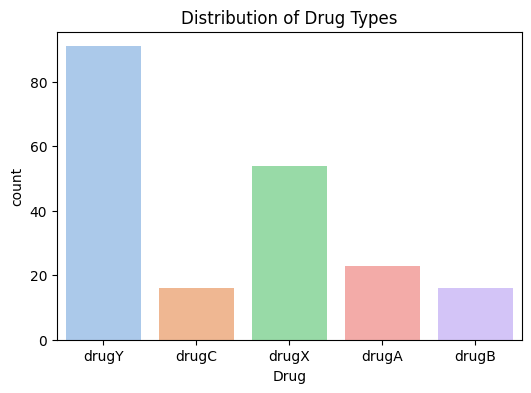

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(x='Drug', data=df, palette='pastel')
plt.title("Distribution of Drug Types")
plt.show()

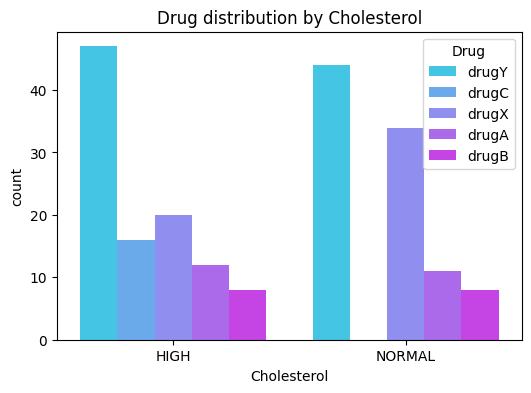

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cholesterol', hue='Drug', data=df, palette='cool')
plt.title("Drug distribution by Cholesterol")
plt.show()

In [87]:
categorical_features = ['Sex', 'BP', 'Cholesterol']

X = df.drop('Drug', axis=1)
y = df['Drug']

X = pd.get_dummies(X, columns=categorical_features, drop_first=True).astype(int)


print("\nAfter Encoding:")
print(X.head())


After Encoding:
   Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   23       25      0       0          0                   0
1   47       13      1       1          0                   0
2   47       10      1       1          0                   0
3   28        7      0       0          1                   0
4   61       18      0       1          0                   0


test train and splitting

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (160, 6)
Test shape: (40, 6)


In [90]:
dTree = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4,min_samples_split=4,min_samples_leaf=2)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [74]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
1.0


In [66]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [67]:
print(confusion_matrix(y_test, y_pred))

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


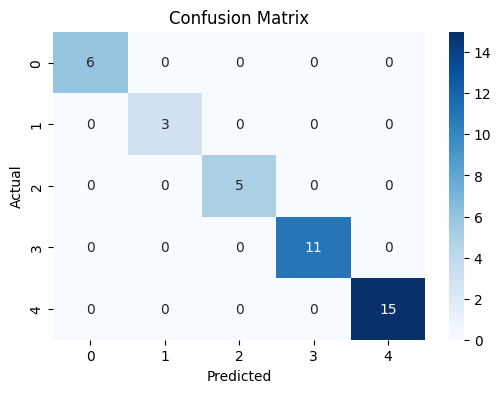

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

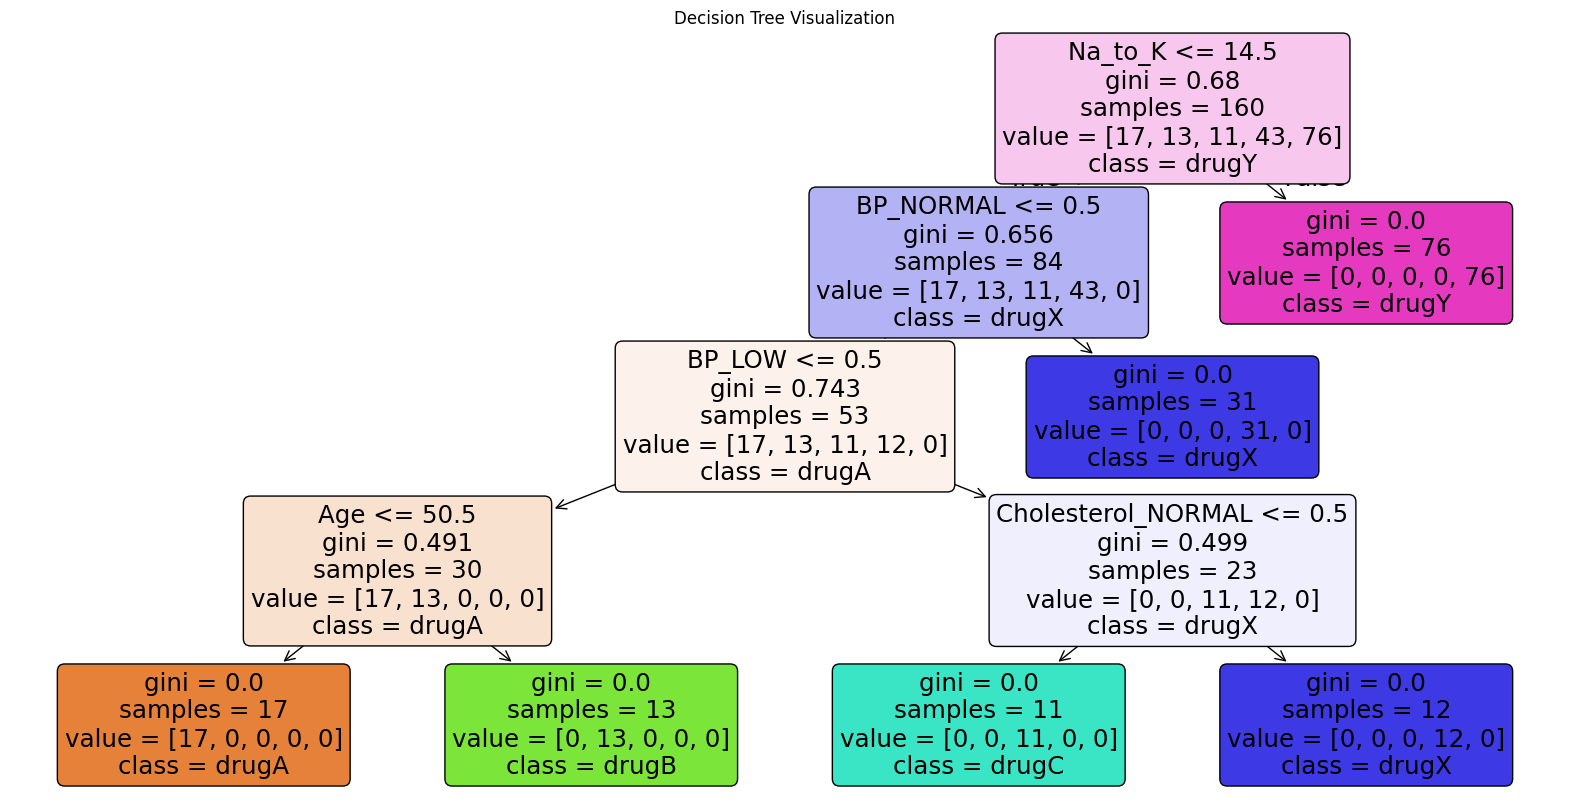

In [91]:
plt.figure(figsize=(20,10))
plot_tree(dTree, feature_names=X.columns, class_names=dTree.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()